In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import matplotlib.lines as mlines
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

## Part 1: Data visualization techniques (28 points)

Using any dataset or datasets, generated by yourself, taken from this course, from this quiz, or from anywhere:

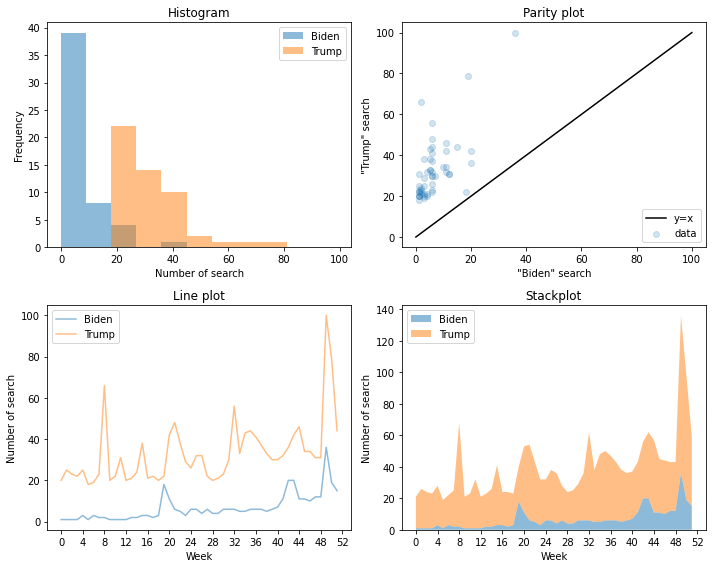

In [2]:
data = pd.read_csv('Biden_Trump_GGsearch.csv')
fig,ax = plt.subplots(2,2,figsize = (10,8))
col = data.columns
ax[0,0].hist(data[col[1]],bins=np.arange(0,100,9),alpha=0.5)
ax[0,0].hist(data[col[2]],bins=np.arange(0,100,9),alpha=0.5)
ax[0,0].set_xlabel('Number of search')
ax[0,0].set_ylabel('Frequency')
ax[0,0].legend(['Biden','Trump'])
ax[0,0].set_title('Histogram')

ax[0,1].scatter(data[col[1]],data[col[2]],alpha=0.2)
ax[0,1].plot(np.linspace(0,100,10),np.linspace(0,100,10),'k-')
ax[0,1].set_xlabel('"Biden" search')
ax[0,1].set_ylabel('"Trump" search')
ax[0,1].legend(['y=x','data'],loc='lower right')
ax[0,1].set_title('Parity plot')

ax[1,0].plot(data.index,data[col[1]],alpha=0.5)
ax[1,0].plot(data.index,data[col[2]],alpha=0.5)
ax[1,0].set_xlabel('Week')
ax[1,0].set_ylabel('Number of search')
ax[1,0].legend(['Biden','Trump'])
ax[1,0].set_title('Line plot')
ax[1,0].set_xticks(np.arange(0,53,4))

labels = ['Biden','Trump']
ax[1,1].stackplot(data.index,data[col[1]],data[col[2]],alpha=0.5,labels=labels)
ax[1,1].set_xlabel('Week')
ax[1,1].set_ylabel('Number of search')
ax[1,1].legend(loc='upper left')
ax[1,1].set_title('Stackplot')
ax[1,1].set_xticks(np.arange(0,53,4))

fig.tight_layout()

## Part 2: The white wine dataset (60 points)

In [3]:
Wine = pd.read_csv('winequality-white.csv',sep=';')
Wine_sorted = Wine.sort_values(by=['residual sugar','alcohol'],ignore_index=True)
Wine_sorted

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               8.7             0.240         0.35            0.60      0.042   
1               8.7             0.240         0.35            0.60      0.042   
2               5.1             0.140         0.25            0.70      0.039   
3               5.3             0.210         0.29            0.70      0.028   
4               5.2             0.170         0.27            0.70      0.030   
...             ...               ...          ...             ...        ...   
4893            6.8             0.450         0.28           26.05      0.031   
4894            6.8             0.450         0.28           26.05      0.031   
4895            7.9             0.330         0.28           31.60      0.053   
4896            7.9             0.330         0.28           31.60      0.053   
4897            7.8             0.965         0.60           65.80      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  71.0  0.99260  3.08       0.38   
1                    11.0                  71.0  0.99260  3.08       0.38   
2                    15.0                  89.0  0.99190  3.22       0.43   
3                    11.0                  66.0  0.99215  3.30       0.40   
4                    11.0                  68.0  0.99218  3.30       0.41   
...                   ...                   ...      ...   ...        ...   
4893                 27.0                 122.0  1.00295  3.06       0.42   
4894                 27.0                 122.0  1.00295  3.06       0.42   
4895                 35.0                 176.0  1.01030  3.15       0.38   
4896                 35.0                 176.0  1.01030  3.15       0.38   
4897                  8.0                 160.0  1.03898  3.39       0.69   

      alcohol  quality  
0        10.6        5  
1        10.6        5  
2         9.2        6  
3         9.8        5  
4         9.8        5  
...       ...      ...  
4893     10.6        6  
4894     10.6        6  
4895      8.8        6  
4896      8.8        6  
4897     11.7        6  

[4898 rows x 12 columns]

### Categorizing wines and analyzing their properties
The LCBO sugar code categorizes wine as dry if it has less than 2% residual sugar, medium (or semi-dry or semi-sweet) if it has between 2 and 7% residual sugar, and sweet if it has >7% residual sugar. 

In [5]:
Wine_sorted.loc[Wine_sorted['residual sugar'] < 2, 'sweetness'] = 'dry' 
Wine_sorted.loc[(Wine_sorted['residual sugar'] >= 2) & (Wine_sorted['residual sugar'] <= 7), 'sweetness'] = 'medium' 
Wine_sorted.loc[Wine_sorted['residual sugar'] > 7, 'sweetness'] = 'sweet' 
Wine_sorted

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               8.7             0.240         0.35            0.60      0.042   
1               8.7             0.240         0.35            0.60      0.042   
2               5.1             0.140         0.25            0.70      0.039   
3               5.3             0.210         0.29            0.70      0.028   
4               5.2             0.170         0.27            0.70      0.030   
...             ...               ...          ...             ...        ...   
4893            6.8             0.450         0.28           26.05      0.031   
4894            6.8             0.450         0.28           26.05      0.031   
4895            7.9             0.330         0.28           31.60      0.053   
4896            7.9             0.330         0.28           31.60      0.053   
4897            7.8             0.965         0.60           65.80      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  71.0  0.99260  3.08       0.38   
1                    11.0                  71.0  0.99260  3.08       0.38   
2                    15.0                  89.0  0.99190  3.22       0.43   
3                    11.0                  66.0  0.99215  3.30       0.40   
4                    11.0                  68.0  0.99218  3.30       0.41   
...                   ...                   ...      ...   ...        ...   
4893                 27.0                 122.0  1.00295  3.06       0.42   
4894                 27.0                 122.0  1.00295  3.06       0.42   
4895                 35.0                 176.0  1.01030  3.15       0.38   
4896                 35.0                 176.0  1.01030  3.15       0.38   
4897                  8.0                 160.0  1.03898  3.39       0.69   

      alcohol  quality sweetness  
0        10.6        5       dry  
1        10.6        5       dry  
2         9.2        6       dry  
3         9.8        5       dry  
4         9.8        5       dry  
...       ...      ...       ...  
4893     10.6        6     sweet  
4894     10.6        6     sweet  
4895      8.8        6     sweet  
4896      8.8        6     sweet  
4897     11.7        6     sweet  

[4898 rows x 13 columns]

In [6]:
frequency = Wine_sorted['sweetness'].value_counts()
total = frequency[0] + frequency[1] + frequency[2]
print('Fraction of each category: \nDry:\t %.3f \nMedium:\t %.3f \nSweet:\t %.3f\n'
     %(frequency[0]/total,frequency[1]/total,frequency[2]/total))

mean_group = round(Wine_sorted.groupby('sweetness').mean(),3)
mean_all = pd.Series(round(Wine_sorted.mean(),3))
mean_table = mean_group.append(mean_all,ignore_index = 'True')

std_group = round(Wine_sorted.groupby('sweetness').std(),3)
std_all = round(Wine_sorted.std(),3)
std_table = std_group.append(std_all,ignore_index = 'True')

mean_std = mean_table.append(std_table)

mean_std = mean_std.sort_index()
s1 = pd.Series(['Dry','Dry','Medium','Medium','Sweet','Sweet','All','All'])
s2 = pd.Series(['Mean','STD','Mean','STD','Mean','STD','Mean','STD'])
table = mean_std.set_index([s1,s2])
table.transpose()

Fraction of each category: 
Dry:	 0.399 
Medium:	 0.311 
Sweet:	 0.290



Dry           Medium            Sweet          \
                         Mean     STD     Mean     STD     Mean     STD   
fixed acidity           6.826   0.961    6.745   0.832    6.961   0.743   
volatile acidity        0.258   0.102    0.290   0.104    0.284   0.095   
citric acid             0.333   0.123    0.316   0.108    0.349   0.128   
residual sugar          1.380   0.278    4.308   1.587   11.656   3.618   
chlorides               0.045   0.024    0.044   0.024    0.048   0.019   
free sulfur dioxide    29.594  15.624   32.293  16.719   41.809  16.025   
total sulfur dioxide  118.432  35.988  129.685  38.944  159.601  40.071   
density                 0.992   0.002    0.993   0.002    0.997   0.002   
pH                      3.217   0.161    3.205   0.149    3.154   0.137   
sulphates               0.494   0.121    0.496   0.121    0.483   0.102   
alcohol                10.863   1.071   11.055   1.230    9.840   1.006   
quality                 5.859   0.900    6.060   0.925    5.749   0.817   

                          All          
                         Mean     STD  
fixed acidity           6.855   0.844  
volatile acidity        0.278   0.101  
citric acid             0.334   0.121  
residual sugar          6.391   5.072  
chlorides               0.046   0.022  
free sulfur dioxide    35.308  17.007  
total sulfur dioxide  138.361  42.498  
density                 0.994   0.003  
pH                      3.188   0.151  
sulphates               0.490   0.114  
alcohol                10.514   1.231  
quality                 5.878   0.886

**<font color=blue>0 / 5 points</font>** When wine is fermented, sugar is converted into alcohol. We might therefore expect that high-alcohol wines have less sugar. Do you observe this trend across the whole dataset? What about within each category (for example, among dry wines, do high-alcohol wines have less sugar)? No need to perform regression for this question; plotting the data and describing what you see is sufficient.

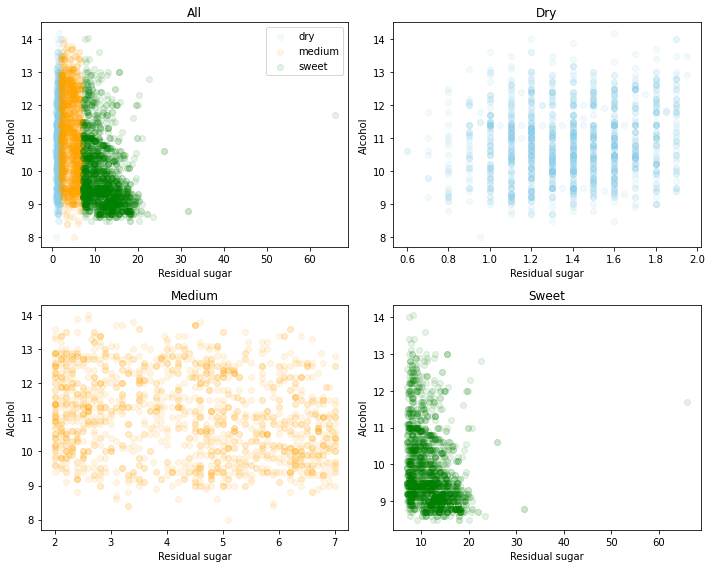

In [8]:
fig,ax = plt.subplots(2,2,figsize = (10,8))

# All 
ax[0,0].scatter(Wine_sorted.loc[Wine_sorted['sweetness']=='dry']['residual sugar'],
                Wine_sorted.loc[Wine_sorted['sweetness']=='dry']['alcohol'],
                color='skyblue',
                alpha=0.1)
ax[0,0].scatter(Wine_sorted.loc[Wine_sorted['sweetness']=='medium']['residual sugar'],
                Wine_sorted.loc[Wine_sorted['sweetness']=='medium']['alcohol'],
                color='orange',
                alpha=0.1)
ax[0,0].scatter(Wine_sorted.loc[Wine_sorted['sweetness']=='sweet']['residual sugar'],
                Wine_sorted.loc[Wine_sorted['sweetness']=='sweet']['alcohol'],
                color='green',
                alpha=0.1)
ax[0,0].legend(['dry','medium','sweet'])
ax[0,0].set_xlabel('Residual sugar')
ax[0,0].set_ylabel('Alcohol')
ax[0,0].set_title('All')

# Dry
ax[0,1].scatter(Wine_sorted.loc[Wine_sorted['sweetness']=='dry']['residual sugar'],
                Wine_sorted.loc[Wine_sorted['sweetness']=='dry']['alcohol'],
                color='skyblue',
                alpha=0.1)
ax[0,1].set_xlabel('Residual sugar')
ax[0,1].set_ylabel('Alcohol')
ax[0,1].set_title('Dry')

# Medium
ax[1,0].scatter(Wine_sorted.loc[Wine_sorted['sweetness']=='medium']['residual sugar'],
                Wine_sorted.loc[Wine_sorted['sweetness']=='medium']['alcohol'],
                color='orange',
                alpha=0.1)
ax[1,0].set_xlabel('Residual sugar')
ax[1,0].set_ylabel('Alcohol')
ax[1,0].set_title('Medium')

# Sweet
ax[1,1].scatter(Wine_sorted.loc[Wine_sorted['sweetness']=='sweet']['residual sugar'],
                Wine_sorted.loc[Wine_sorted['sweetness']=='sweet']['alcohol'],
                color='green',
                alpha=0.1)
ax[1,1].set_xlabel('Residual sugar')
ax[1,1].set_ylabel('Alcohol')
ax[1,1].set_title('Sweet')
fig.tight_layout()

**<font color=blue>0 / 5 points</font>** Modify the plotly code from Lecture 10, which we used to make a grid of scatterplots comparing each physical property with the quality. In this case, plot quality on the y axis vs. the property on the x axis, and plot each category using different colors. Make sure each subplot has the same color scheme; for example, dry wines get the same color in all of the subplots.

In [10]:
PropertyList = Wine_sorted.columns

rowcollist = np.arange(1,len(PropertyList))
rowcollist = rowcollist.reshape(4,3)

dry_group = Wine_sorted.loc[Wine_sorted['sweetness']=='dry']
medium_group = Wine_sorted.loc[Wine_sorted['sweetness']=='medium']                     
sweet_group = Wine_sorted.loc[Wine_sorted['sweetness']=='sweet']

fig = make_subplots(rows=4, cols=3)

for i in range(0,len(PropertyList)-2):
    r,c = np.where(rowcollist == i+1)
    fig.add_trace(go.Scatter(y=dry_group['quality'],
                             x=dry_group[PropertyList[i]],
                             mode='markers',
                             name='Dry',
                             legendgroup='Dry',
                             showlegend=True if i== 0 else False,
                             marker=dict(
                                color='skyblue',
                                 opacity=0.1,
                                line=dict(color='white',width=0.2),
                             ),
                            ),
                  row = r[0]+1, col = c[0]+1,
                  )
    fig.add_trace(go.Scatter(y=medium_group['quality'],
                             x=medium_group[PropertyList[i]],
                             mode='markers',
                             name='Medium',
                             legendgroup='Medium',
                             showlegend=True if i== 0 else False,
                             marker=dict(
                                color='orange',
                                opacity=0.1,
                                line=dict(color='white',width=0.2),
                             ),
                            ), 
                  row = r[0]+1, col = c[0]+1,
                  )
    fig.add_trace(go.Scatter(y=sweet_group['quality'],
                             x=sweet_group[PropertyList[i]],
                             mode='markers',
                             legendgroup='Sweet',
                             showlegend=True if i== 0 else False,
                             name='Sweet',
                             marker=dict(
                                color='green',
                                opacity=0.1,
                                line=dict(color='white',width=0.2),
                             ),
                            ),
                    
                  row = r[0]+1, col = c[0]+1,
                  )

    fig.update_xaxes(title_text=PropertyList[i], row=r[0]+1, col=c[0]+1)
    fig.update_yaxes(title_text='quality', row=r[0]+1, col=c[0]+1,title_standoff = 1)

fig.update_layout(
    autosize = False, 
    height=1200,
    width=700,
    title="Wine_sorted quality correlations",
    legend_title_text='Categories',
    showlegend=True)
fig.show()

### Predicting wine quality (35 points)


Training root mean squared error: 0.76 unit of quality
Test root mean squared error: 0.72 unit of quality


<bound method Figure.show of <Figure size 576x432 with 1 Axes>>

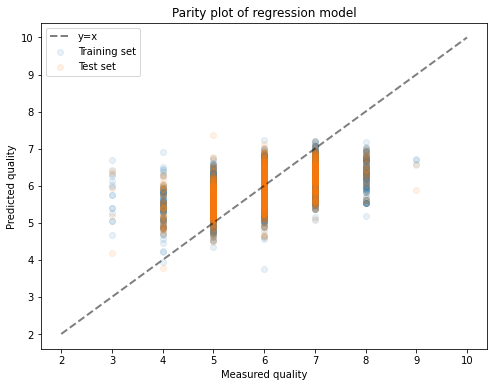

In [11]:
PropertyList = Wine.columns
WineProps = (Wine_sorted[PropertyList] - Wine_sorted[PropertyList].mean())/Wine_sorted[PropertyList].std()
WineProps['sweetness'] = Wine_sorted['sweetness']
X_train, X_test, y_train, y_test = train_test_split(WineProps.drop(columns=['quality']),
                                                    WineProps['quality'], test_size=0.30, random_state=0)

# Fitting model
regr = LinearRegression()

regr.fit(X_train.drop(columns=['sweetness']),y_train)

pred_train = regr.predict(X_train.drop(columns=['sweetness']))
pred_test = regr.predict(X_test.drop(columns=['sweetness']))

# Un-normalized
quality_mean = Wine[PropertyList].mean()[-1]
quality_std = Wine[PropertyList].std()[-1]

unit_y_train = y_train * quality_std + quality_mean
unit_y_test = y_test * quality_std + quality_mean
unit_pred_train = pred_train * quality_std + quality_mean
unit_pred_test = pred_test * quality_std + quality_mean

# RMSE 
# The root mean squared error
print('Training root mean squared error: %.2f unit of quality'
      % mean_squared_error(unit_y_train,unit_pred_train,squared=False))
print('Test root mean squared error: %.2f unit of quality'
      % mean_squared_error(unit_y_test,unit_pred_test,squared=False))

# Parity plot
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(unit_y_train,unit_pred_train,alpha=0.1)
ax.scatter(unit_y_test,unit_pred_test,alpha=0.1)
ax.plot(np.linspace(2,10,10),np.linspace(2,10,10),'k--',linewidth=2,alpha=0.5)
ax.set_xlabel('Measured quality')
ax.set_ylabel('Predicted quality')
ax.set_title('Parity plot of regression model')
ax.legend(['y=x','Training set','Test set'])

fig.show

In [12]:
# Create Lasso regression object
lasso_regr = Lasso(alpha=0.078) 

# Fit the model
lasso_regr.fit(X_train.drop(columns=['sweetness']),y_train.drop(columns=['sweetness']))

# Take a look at the coefficients
for j in range(0,len(lasso_regr.coef_)):
    print(lasso_regr.coef_[j])

pred_train = lasso_regr.predict(X_train.drop(columns=['sweetness'])) # X is the argument for regr.predict()
pred_test = lasso_regr.predict(X_test.drop(columns=['sweetness']))
    
# The root mean squared error
print('\nNormalized RMSE for train set: %.2f'
      % mean_squared_error(y_train,pred_train,squared=False))
print('Normalized RMSE for test set: %.2f'
      % mean_squared_error(y_test,pred_test,squared=False))

-0.002346571855045271
-0.12718254464712744
-0.0
0.002252895690161424
-0.0
0.0
-0.0
-0.0
0.0
0.0
0.3807832744604573

Normalized RMSE for train set: 0.89
Normalized RMSE for test set: 0.85


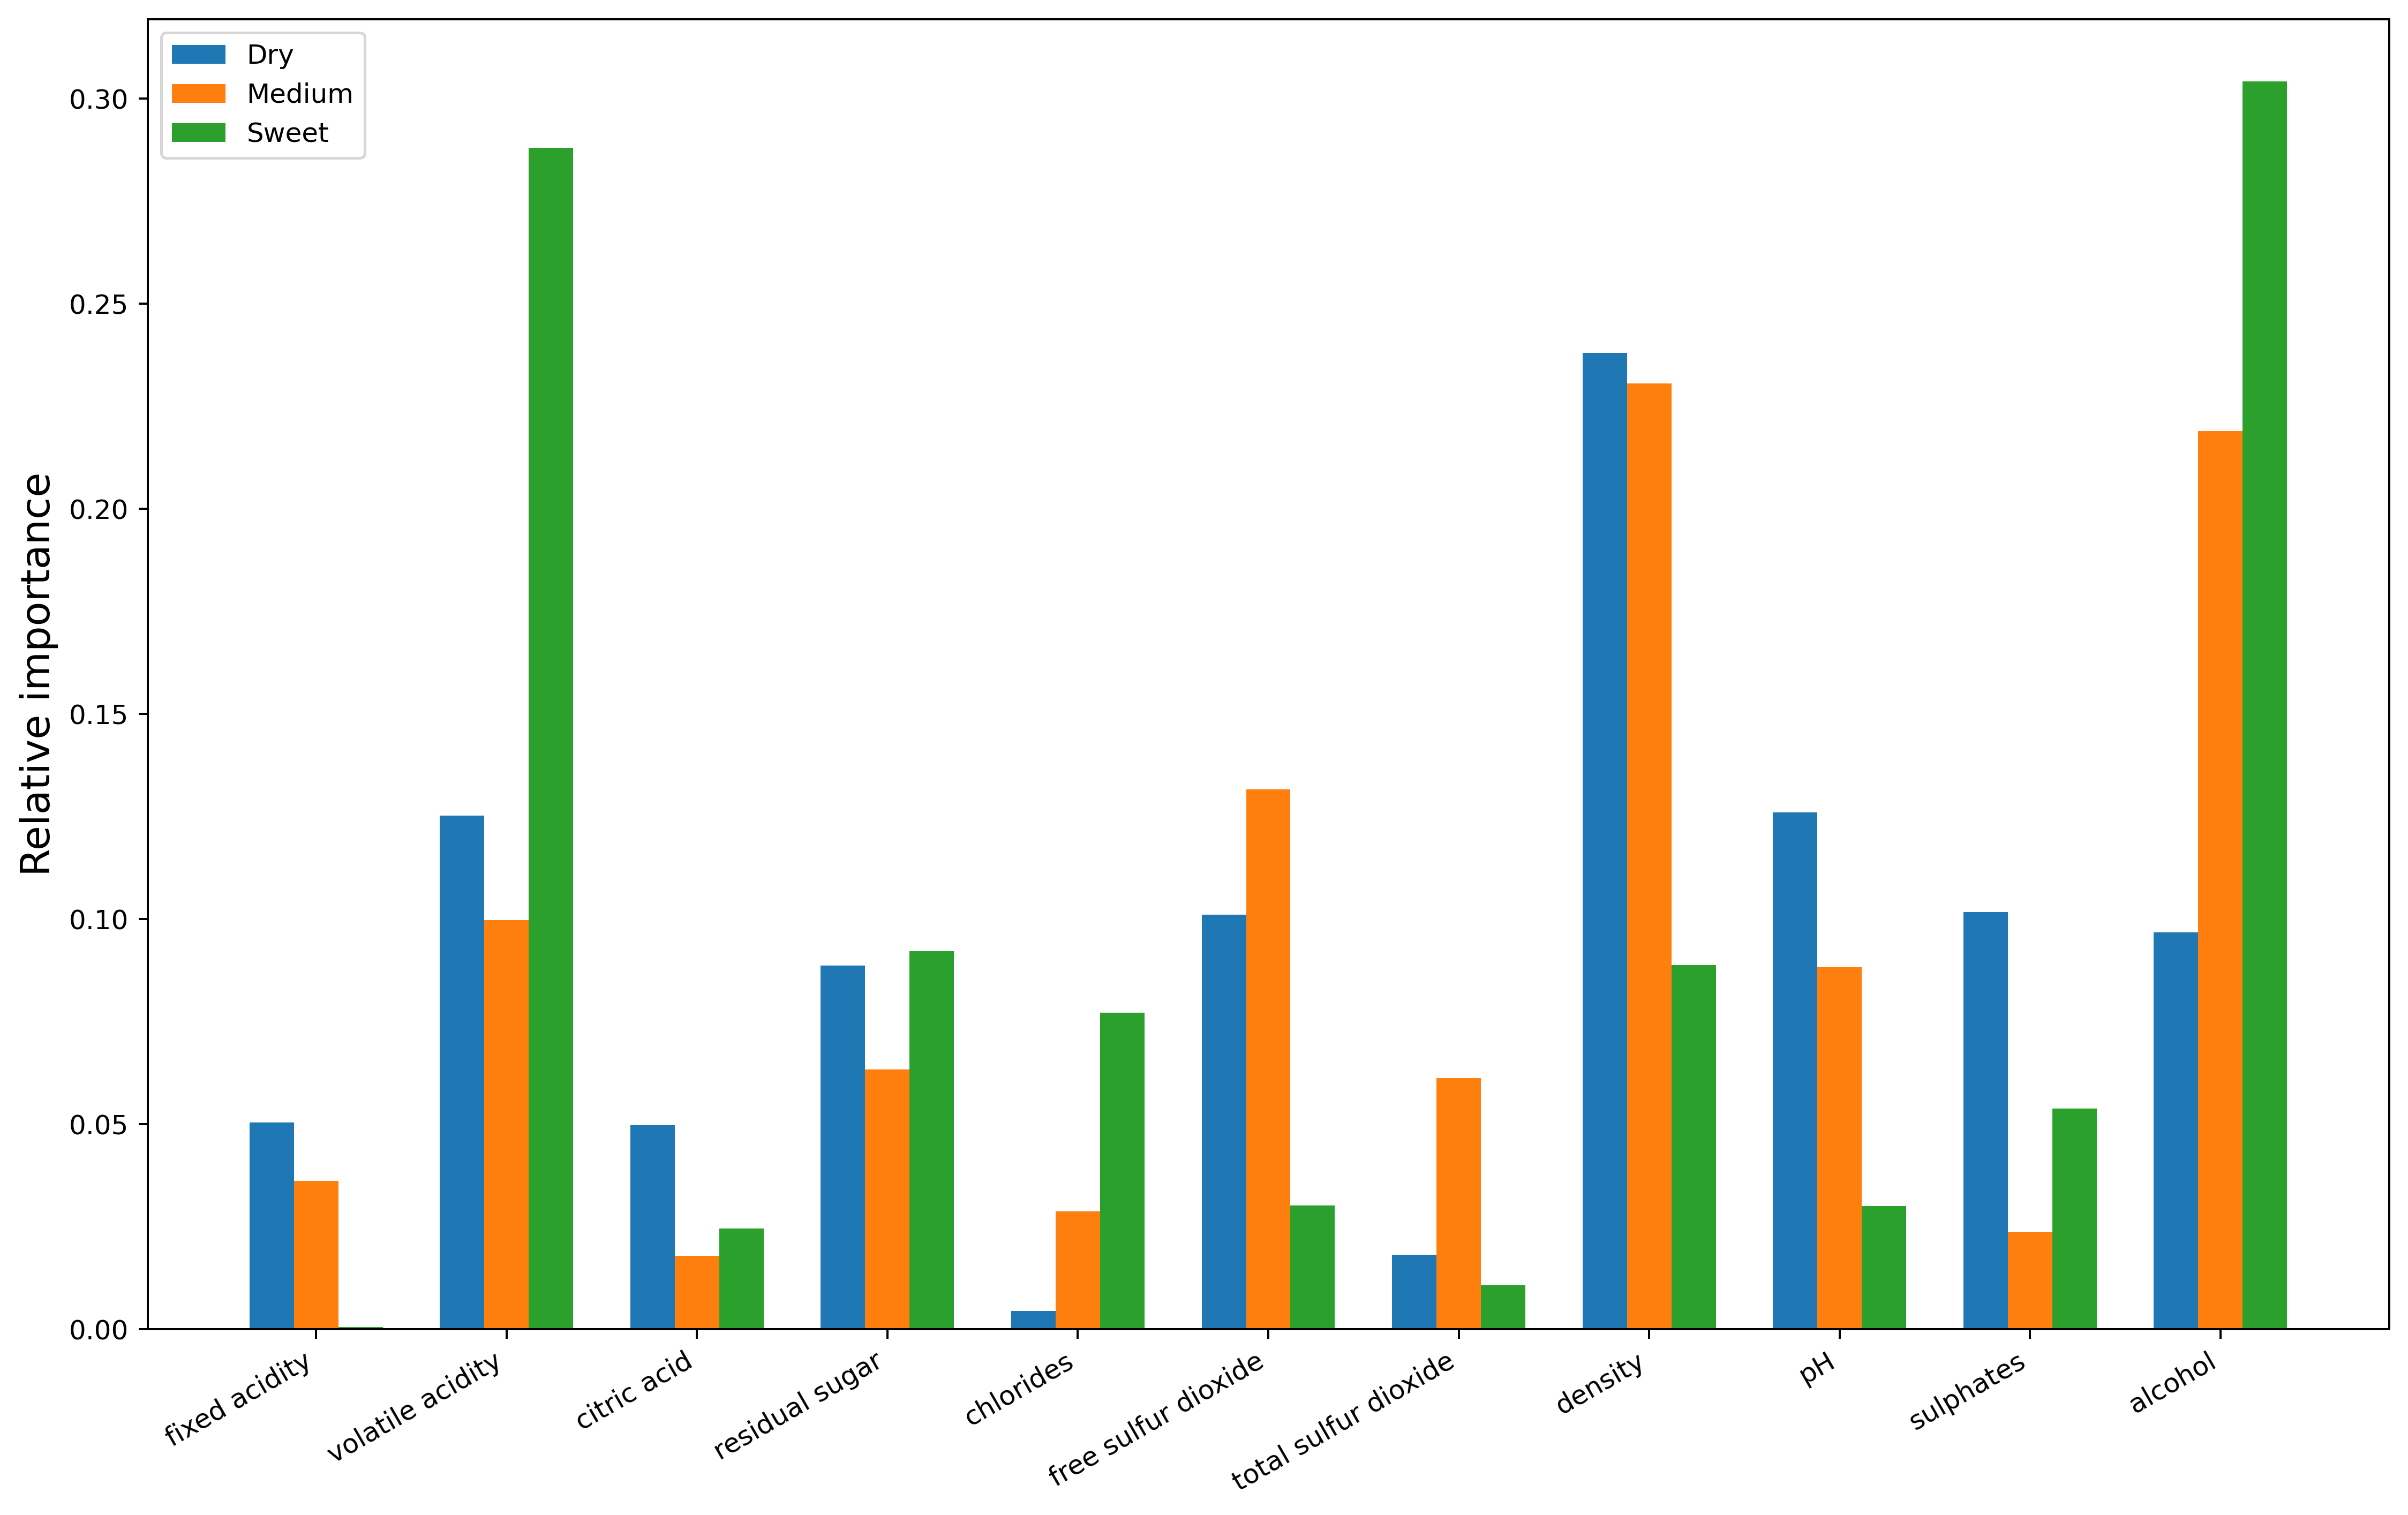

In [14]:
# Relative importance is defined as: abs(weight)/abs(total weight)

rel_imp = []
labels = list(Wine.columns)
del labels[-1]

for i in range(len(list_coef)):
    array_coef = np.array(list_coef[i])
    rel_imp.append(abs(array_coef)/np.sum(abs(array_coef)))

x = 3*np.arange(len(labels))
width = 0.70

fig, ax = plt.subplots(figsize=(15, 9),dpi = 360)
rects1 = ax.bar(x-width,rel_imp[0],width,label='Dry')
rects2 = ax.bar(x,rel_imp[1],width,label='Medium')
rects3 = ax.bar(x+width,rel_imp[2],width,label='Sweet')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Relative importance',fontsize=15)
ax.legend()
fig = plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

Text(0.5, 1.0, 'Parity plot for three Lasso regression models')

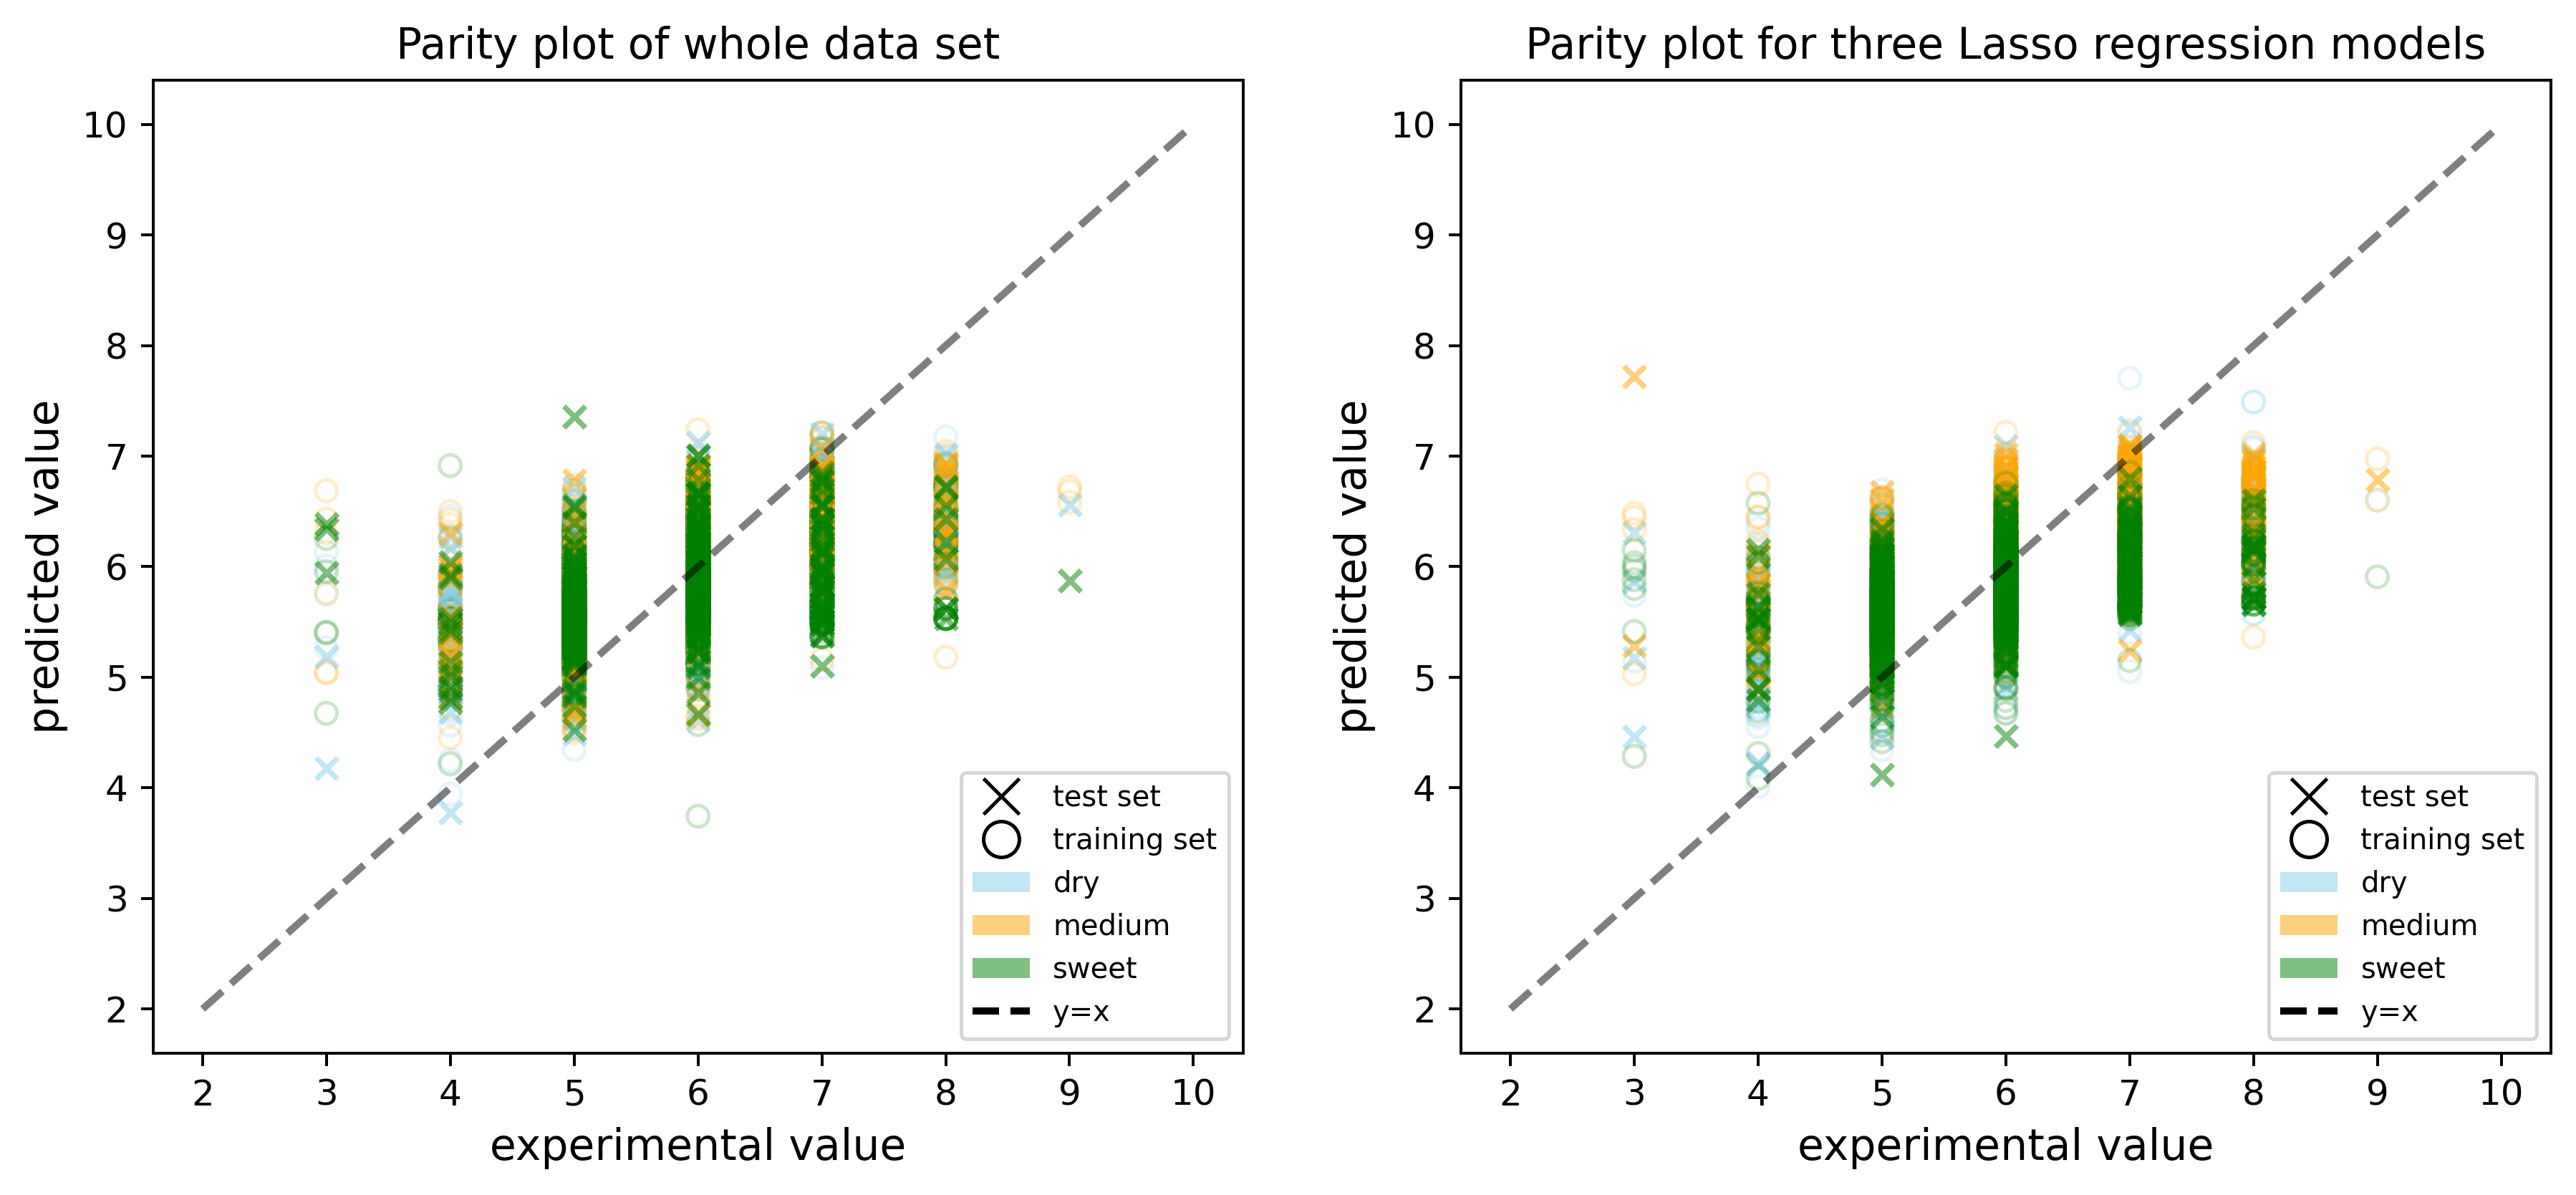

In [16]:
mean = mean_all['quality']
std = std_all['quality']

# function to unnormalize quality
def un_norm(data_set,mean,std):
    return data_set*std+mean
    
fig, ax = plt.subplots(1,2,figsize=(12,5),dpi=360)

# Fig 1: using whole data set and non-penalized regression model

# sorting training group
X_train_dry = X_train.loc[X_train['sweetness']=='dry']
X_train_medium = X_train.loc[X_train['sweetness']=='medium']                     
X_train_sweet = X_train.loc[X_train['sweetness']=='sweet']

y_train_dry = np.asarray([y_train[i] for i in X_train_dry.index])
y_train_medium = np.asarray([y_train[i] for i in X_train_medium.index])
y_train_sweet = np.asarray([y_train[i] for i in X_train_sweet.index])

# sorting testing group to plot them separately
X_test_dry = X_test.loc[X_test['sweetness']=='dry']
X_test_medium = X_test.loc[X_test['sweetness']=='medium']                     
X_test_sweet = X_test.loc[X_test['sweetness']=='sweet']

y_test_dry = np.asarray([y_test[i] for i in X_test_dry.index])
y_test_medium = np.asarray([y_test[i] for i in X_test_medium.index])
y_test_sweet = np.asarray([y_test[i] for i in X_test_sweet.index])

# get predicted value of each group and each category
pred_train_dry = regr.predict(X_train_dry.drop(columns=['sweetness']))
pred_train_medium = regr.predict(X_train_medium.drop(columns=['sweetness']))
pred_train_sweet = regr.predict(X_train_sweet.drop(columns=['sweetness']))

pred_test_dry = regr.predict(X_test_dry.drop(columns=['sweetness']))
pred_test_medium = regr.predict(X_test_medium.drop(columns=['sweetness']))
pred_test_sweet = regr.predict(X_test_sweet.drop(columns=['sweetness']))

# ploting 
ax[0].scatter(un_norm(y_train_dry,mean,std), un_norm(pred_train_dry,mean,std),
                   marker = 'o',facecolors='none', edgecolors='skyblue',alpha=0.2)
ax[0].scatter(un_norm(y_train_medium,mean,std), un_norm(pred_train_medium,mean,std),
                   marker = 'o',facecolors='none', edgecolors='orange',alpha=0.2)
ax[0].scatter(un_norm(y_train_sweet,mean,std), un_norm(pred_train_sweet,mean,std),
                   marker = 'o',facecolors='none', edgecolors='green',alpha=0.2)

ax[0].scatter(un_norm(y_test_dry,mean,std), un_norm(pred_test_dry,mean,std),
                   marker = 'x',alpha=0.5,c='skyblue')
ax[0].scatter(un_norm(y_test_medium,mean,std), un_norm(pred_test_medium,mean,std),
                   marker = 'x',alpha=0.5,c='orange')
ax[0].scatter(un_norm(y_test_sweet,mean,std), un_norm(pred_test_sweet,mean,std),
                   marker = 'x',alpha=0.5,c='green')

ax[0].plot(np.linspace(2,10,10),np.linspace(2,10,10),'k--',linewidth=2,alpha=0.5)

# Making legends
legend_elements = [mlines.Line2D([], [], marker='x', linestyle='None', 
                                 color='k', label='test set',
                                 markerfacecolor='none', markersize=10),
                   mlines.Line2D([], [], marker='o', linestyle='None', 
                                 color='k', label='training set',
                                 markerfacecolor='none', markersize=10),
                   Patch(facecolor='skyblue', edgecolor='none',label='dry',alpha=0.5),
                   Patch(facecolor='orange', edgecolor='none',label='medium',alpha=0.5),
                   Patch(facecolor='green', edgecolor='none',label='sweet',alpha=0.5),
                  mlines.Line2D([0], [0], marker='None', linestyle='--', 
                                 color='k', label='y=x', lw=2),
                  ]

ax[0].set_xlabel('experimental value',fontsize=12)
ax[0].set_ylabel('predicted value',fontsize=12)
ax[0].legend(handles=legend_elements,loc='lower right',prop={'size': 8})
ax[0].set_title('Parity plot of whole data set')


# Fig 2: using the predictions that come from 3 separated ridge regression models. 
color = ['skyblue','orange','green']
for i in range(3):
    ax[1].scatter(un_norm(y_train_list[i],mean_list[i],std_list[i]), 
                  un_norm(pred_train_list[i],mean_list[i],std_list[i]),
                  marker = 'o',facecolors='none', edgecolors=color[i],alpha=0.2)
    ax[1].scatter(un_norm(y_test_list[i],mean_list[i],std_list[i]), 
                  un_norm(pred_test_list[i],mean_list[i],std_list[i]),
                  marker = 'x',facecolors='none', c=color[i],alpha=0.5)
ax[1].plot(np.linspace(2,10,10),np.linspace(2,10,10),'k--',linewidth=2,alpha=0.5)

# Making legends
legend_elements = [mlines.Line2D([], [], marker='x', linestyle='None', 
                                 color='k', label='test set',
                                 markerfacecolor='none', markersize=10),
                   mlines.Line2D([], [], marker='o', linestyle='None', 
                                 color='k', label='training set',
                                 markerfacecolor='none', markersize=10),
                   Patch(facecolor='skyblue', edgecolor='none',label='dry',alpha=0.5),
                   Patch(facecolor='orange', edgecolor='none',label='medium',alpha=0.5),
                   Patch(facecolor='green', edgecolor='none',label='sweet',alpha=0.5),
                  mlines.Line2D([0], [0], marker='None', linestyle='--', 
                                 color='k', label='y=x', lw=2),
                  ]

ax[1].set_xlabel('experimental value',fontsize=12)
ax[1].set_ylabel('predicted value',fontsize=12)
ax[1].legend(handles=legend_elements,loc='lower right',prop={'size': 8})
ax[1].set_title('Parity plot for three Lasso regression models')
